In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

df = pd.read_csv('auto-mpg.csv')
df.replace('?', np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [123]:
print(df.info())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

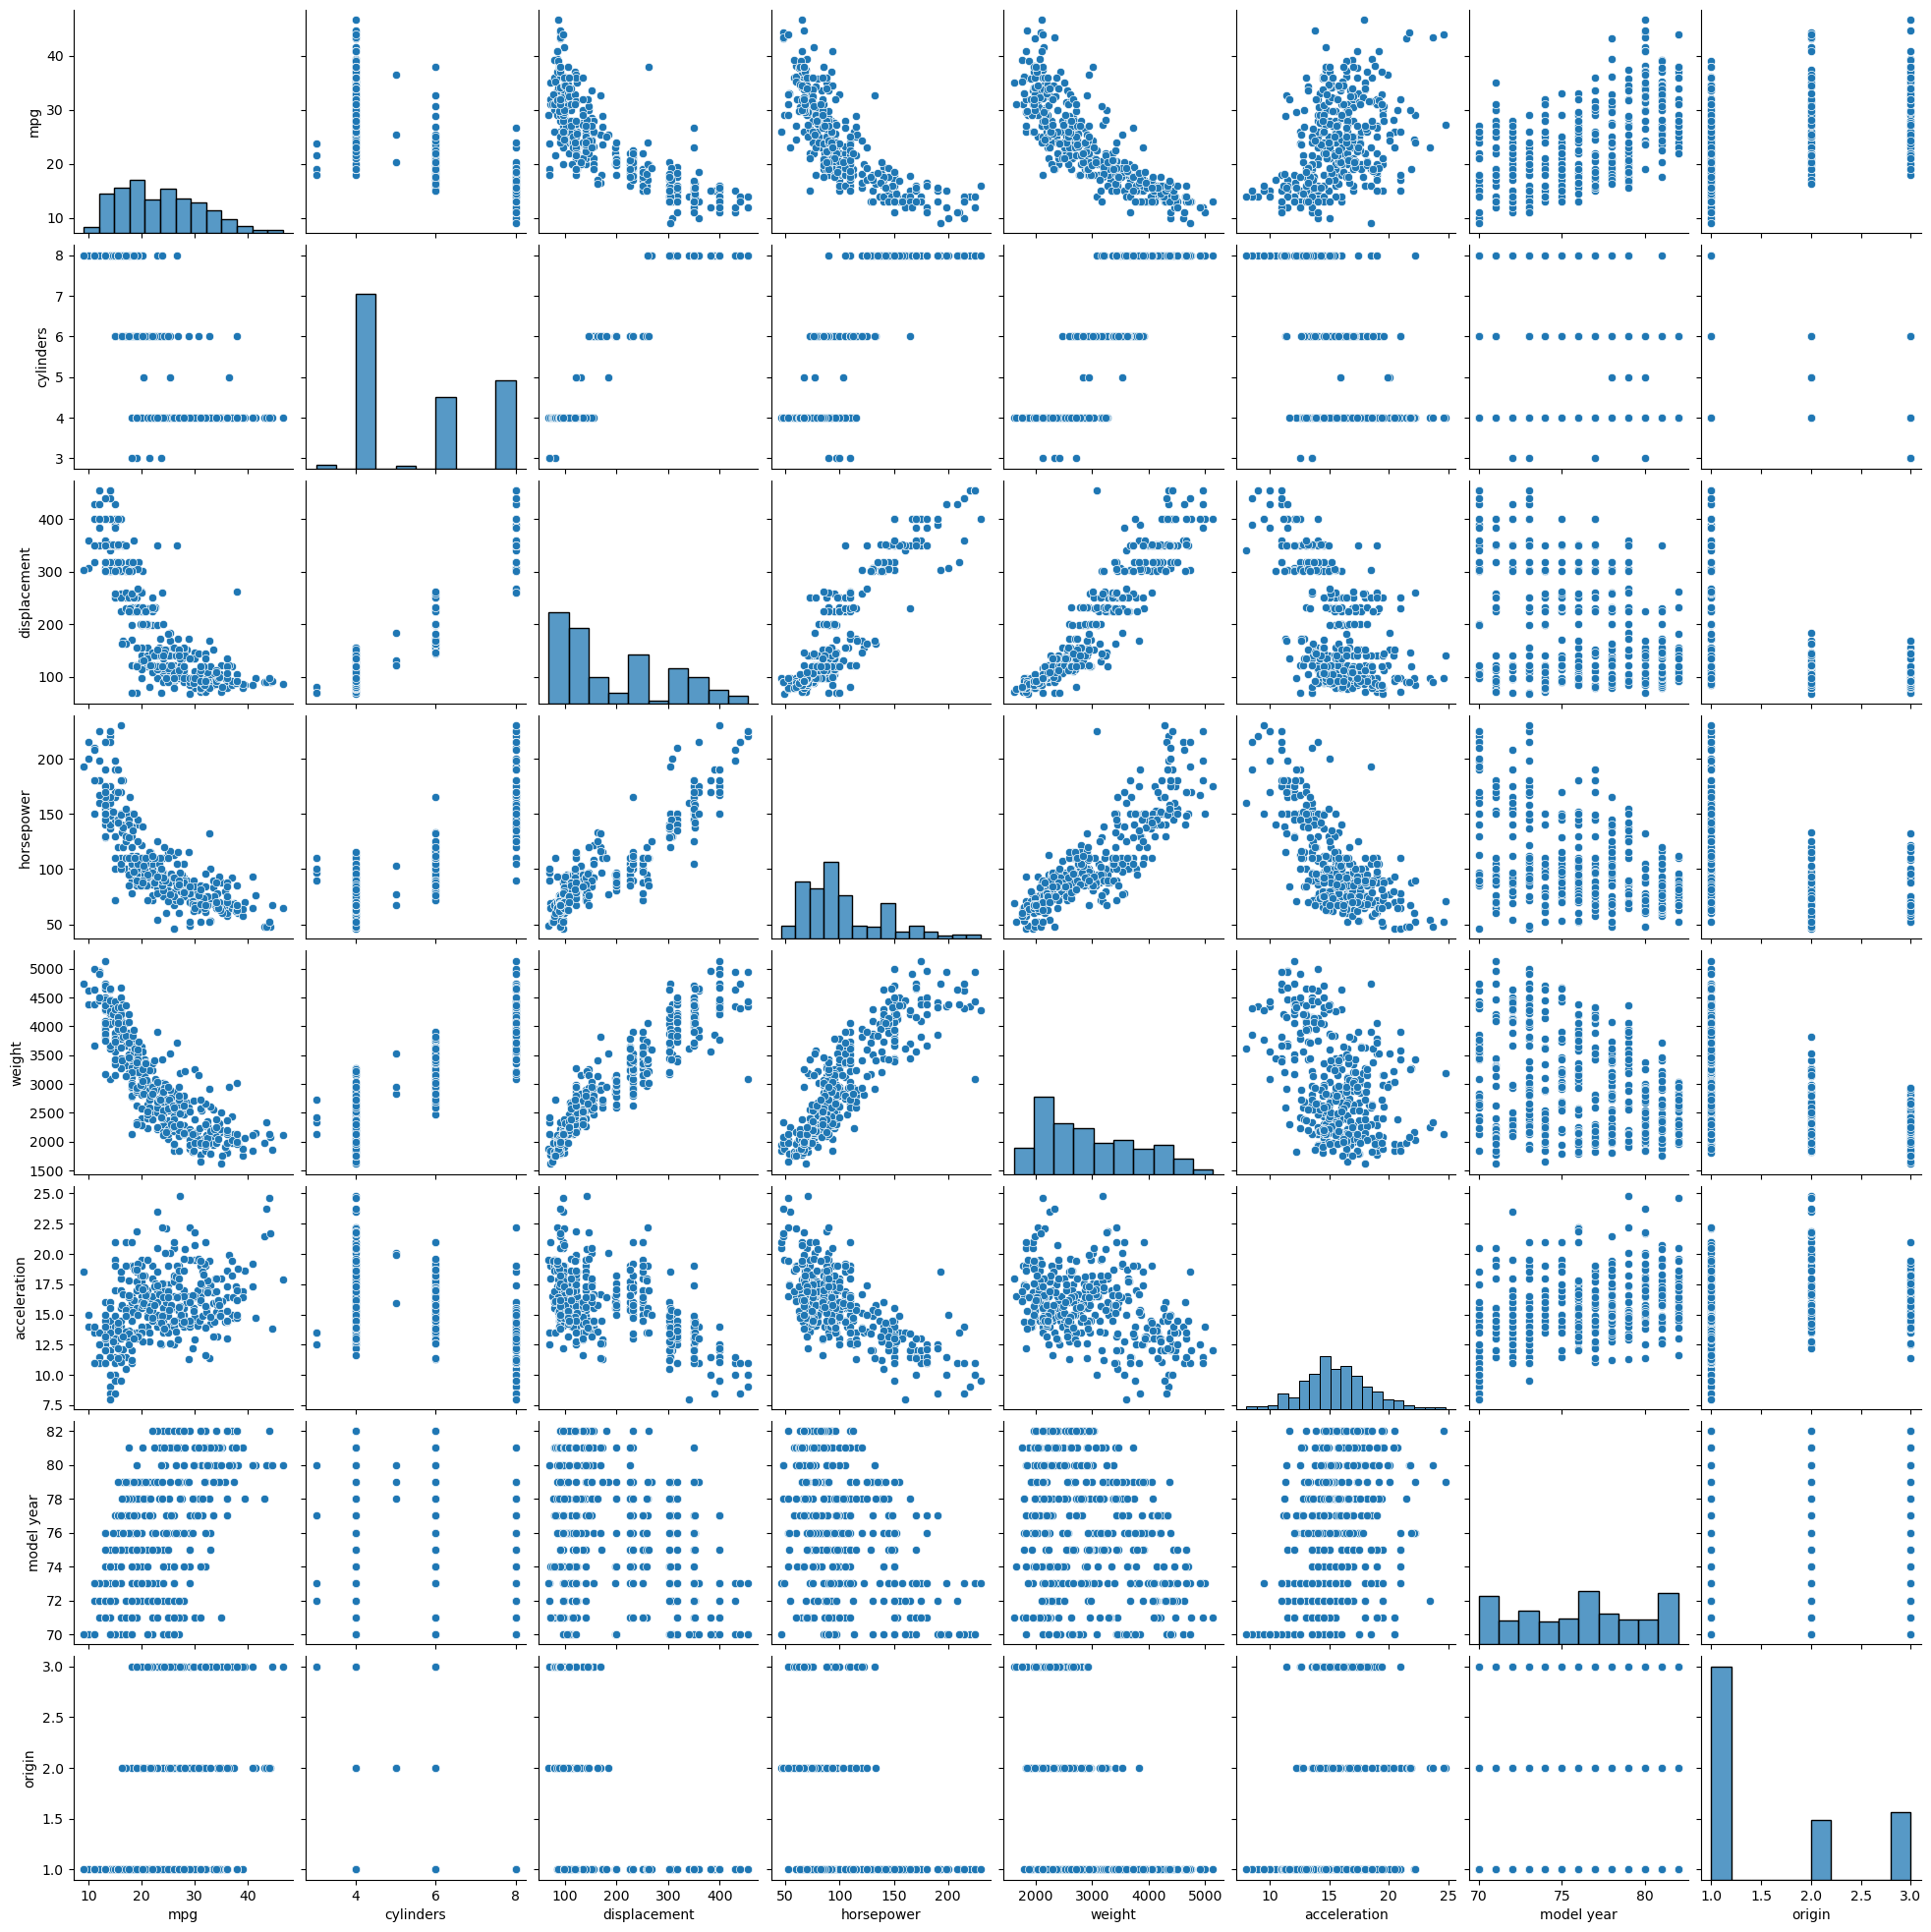

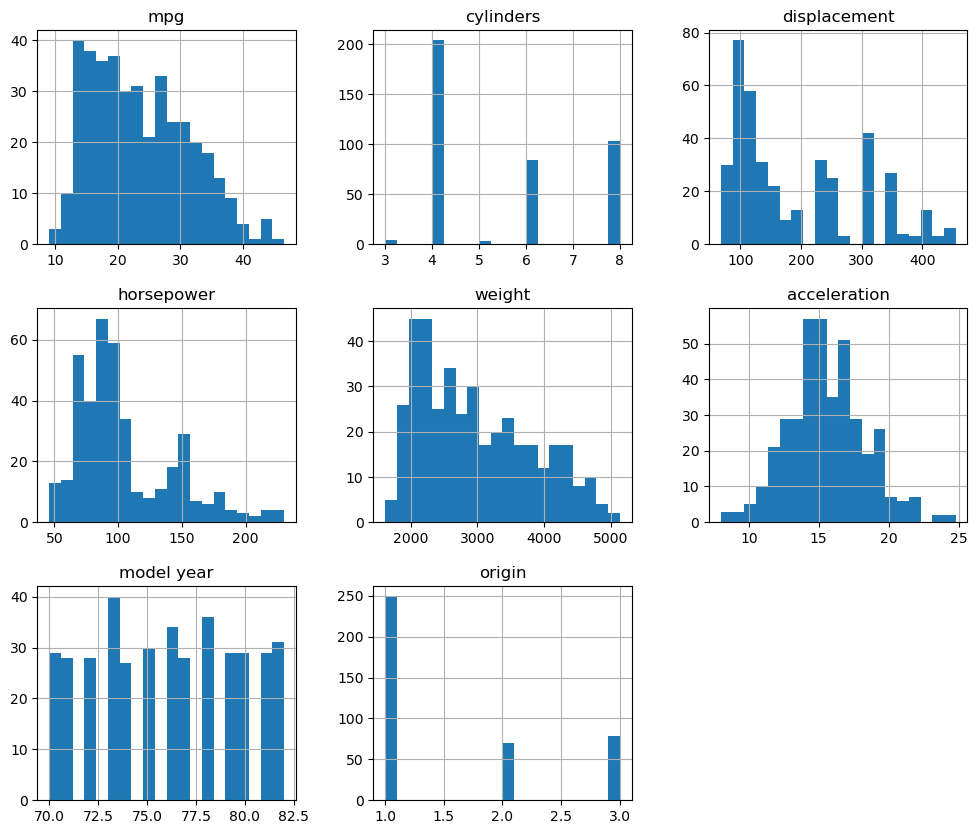

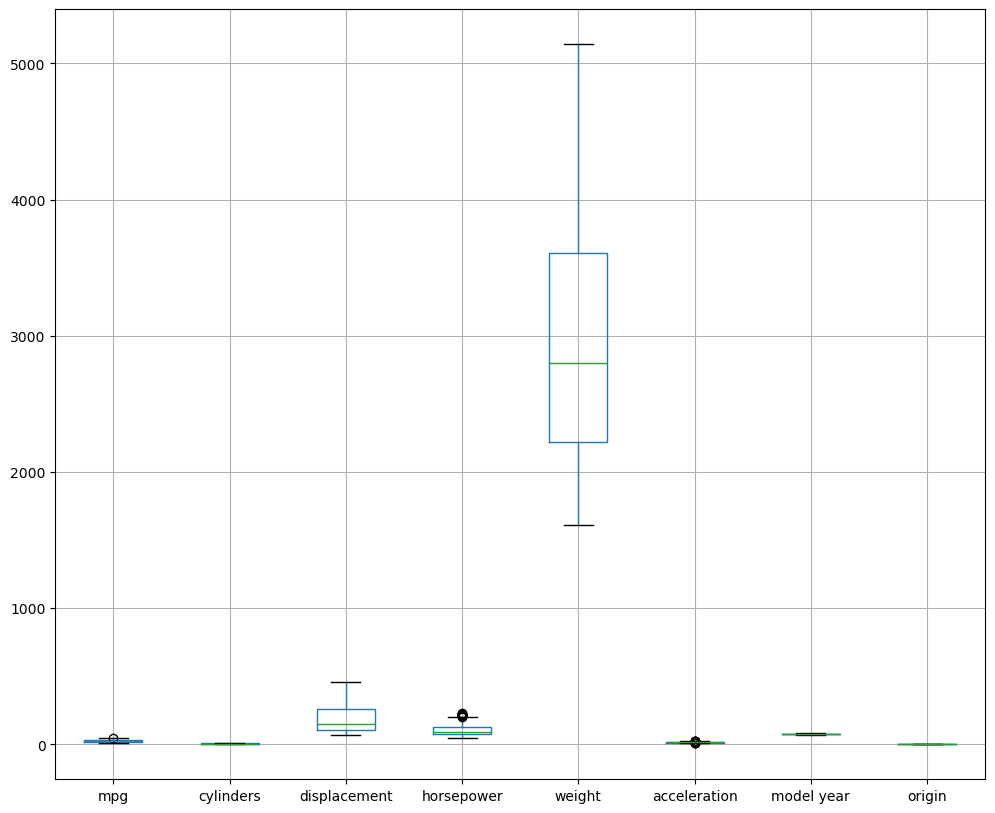

In [124]:
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

df.hist(figsize=(12, 10), bins=20)
plt.show()

df.boxplot(figsize=(12, 10))
plt.show()


In [125]:
df = df.drop('car name', axis=1)

df['weight_per_cylinder'] = df['weight'] / df['cylinders']

df['origin'] = df['origin'].astype('category').cat.codes

In [126]:
X = df.drop('mpg', axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (318, 8)
Testing set shape: (80, 8)


Root Mean Squared Error: 2.7119235149701644


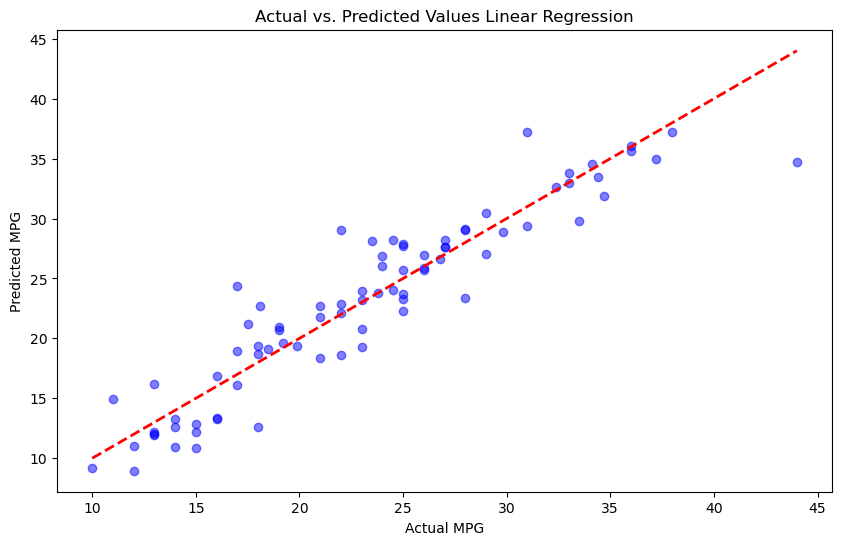

In [127]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Actual vs. Predicted Values Linear Regression')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

Root Mean Squared Error Polynomial Features and Ridge Regression: 2.344461809947926


C:\Users\derek\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.62921e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


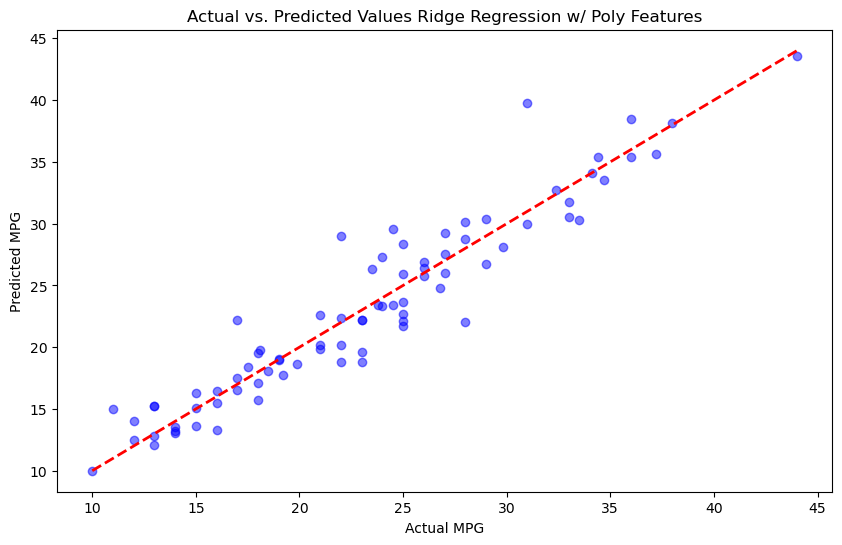

In [128]:
model = make_pipeline(PolynomialFeatures(degree=2), Ridge())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error Polynomial Features and Ridge Regression:', rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Actual vs. Predicted Values Ridge Regression w/ Poly Features')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

Root Mean Squared Error Polynomial Features and Ridge Regression: 3.8733821920508524


C:\Users\derek\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.56437e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


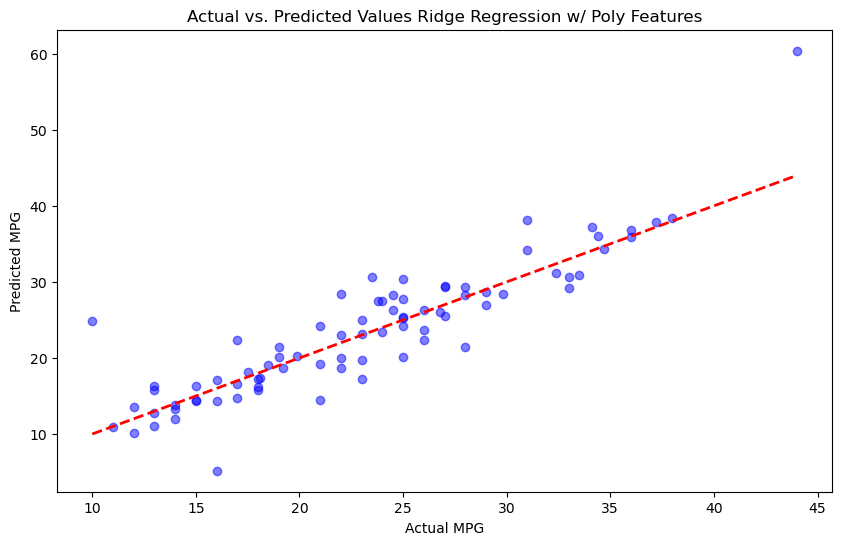

In [129]:
model = make_pipeline(PolynomialFeatures(degree=3), Ridge())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error Polynomial Features and Ridge Regression:', rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Actual vs. Predicted Values Ridge Regression w/ Poly Features')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

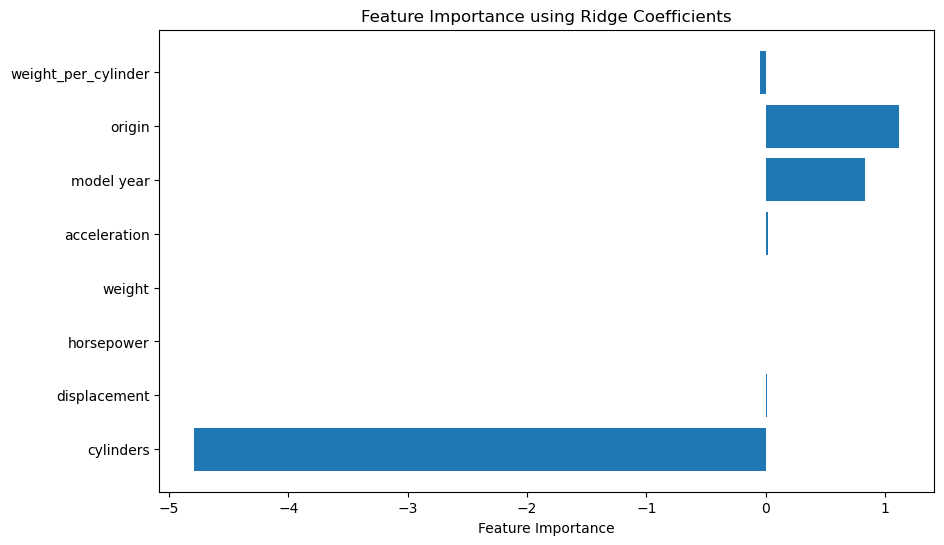

In [130]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
feature_importance = ridge_model.coef_

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Ridge Coefficients')
plt.show()

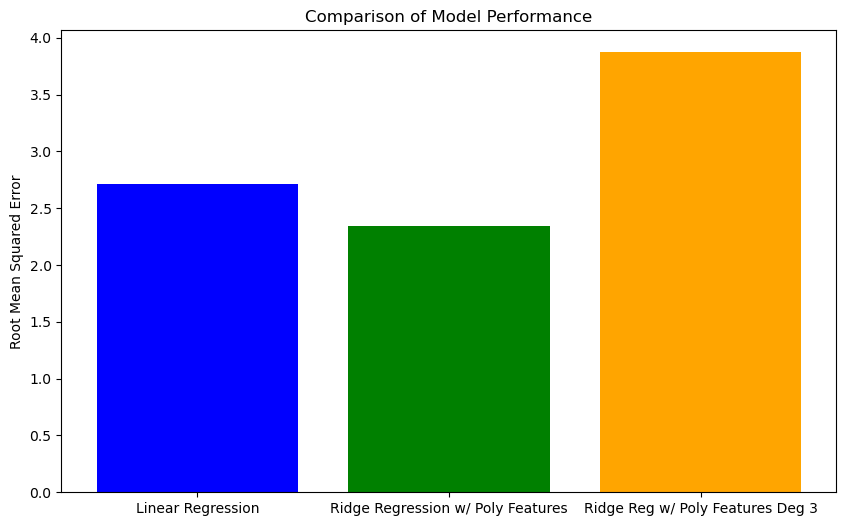

In [131]:
rmses = [2.7119, 2.3444, 3.87338]
model_names = ['Linear Regression', 'Ridge Regression w/ Poly Features', 'Ridge Reg w/ Poly Features Deg 3']

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmses, color=['blue', 'green', 'orange'])
plt.ylabel('Root Mean Squared Error')
plt.title('Comparison of Model Performance')

plt.show()

Summary Statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  weight_per_cylinder  
count    398.000000  398.000000  398.000000           398.000000  
mean      15.568090   76.010050    0.572864           554.087102  
std        2.757689    3.697627    0.802055            82.427775  
min        8.000000   70.000000    0.000000           385.75000

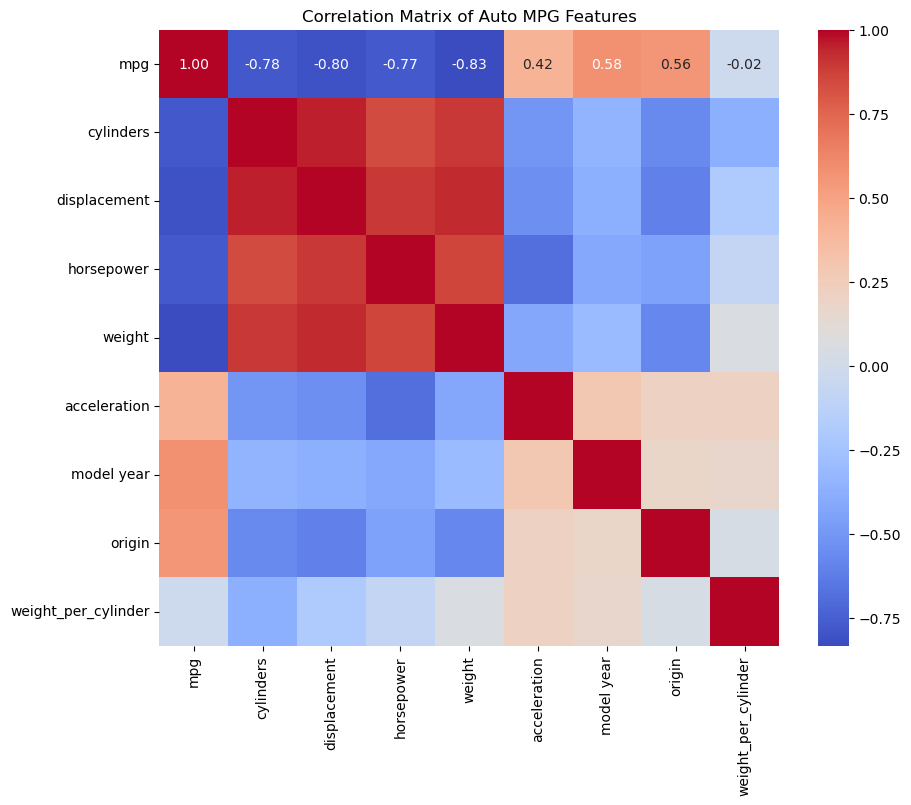

C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

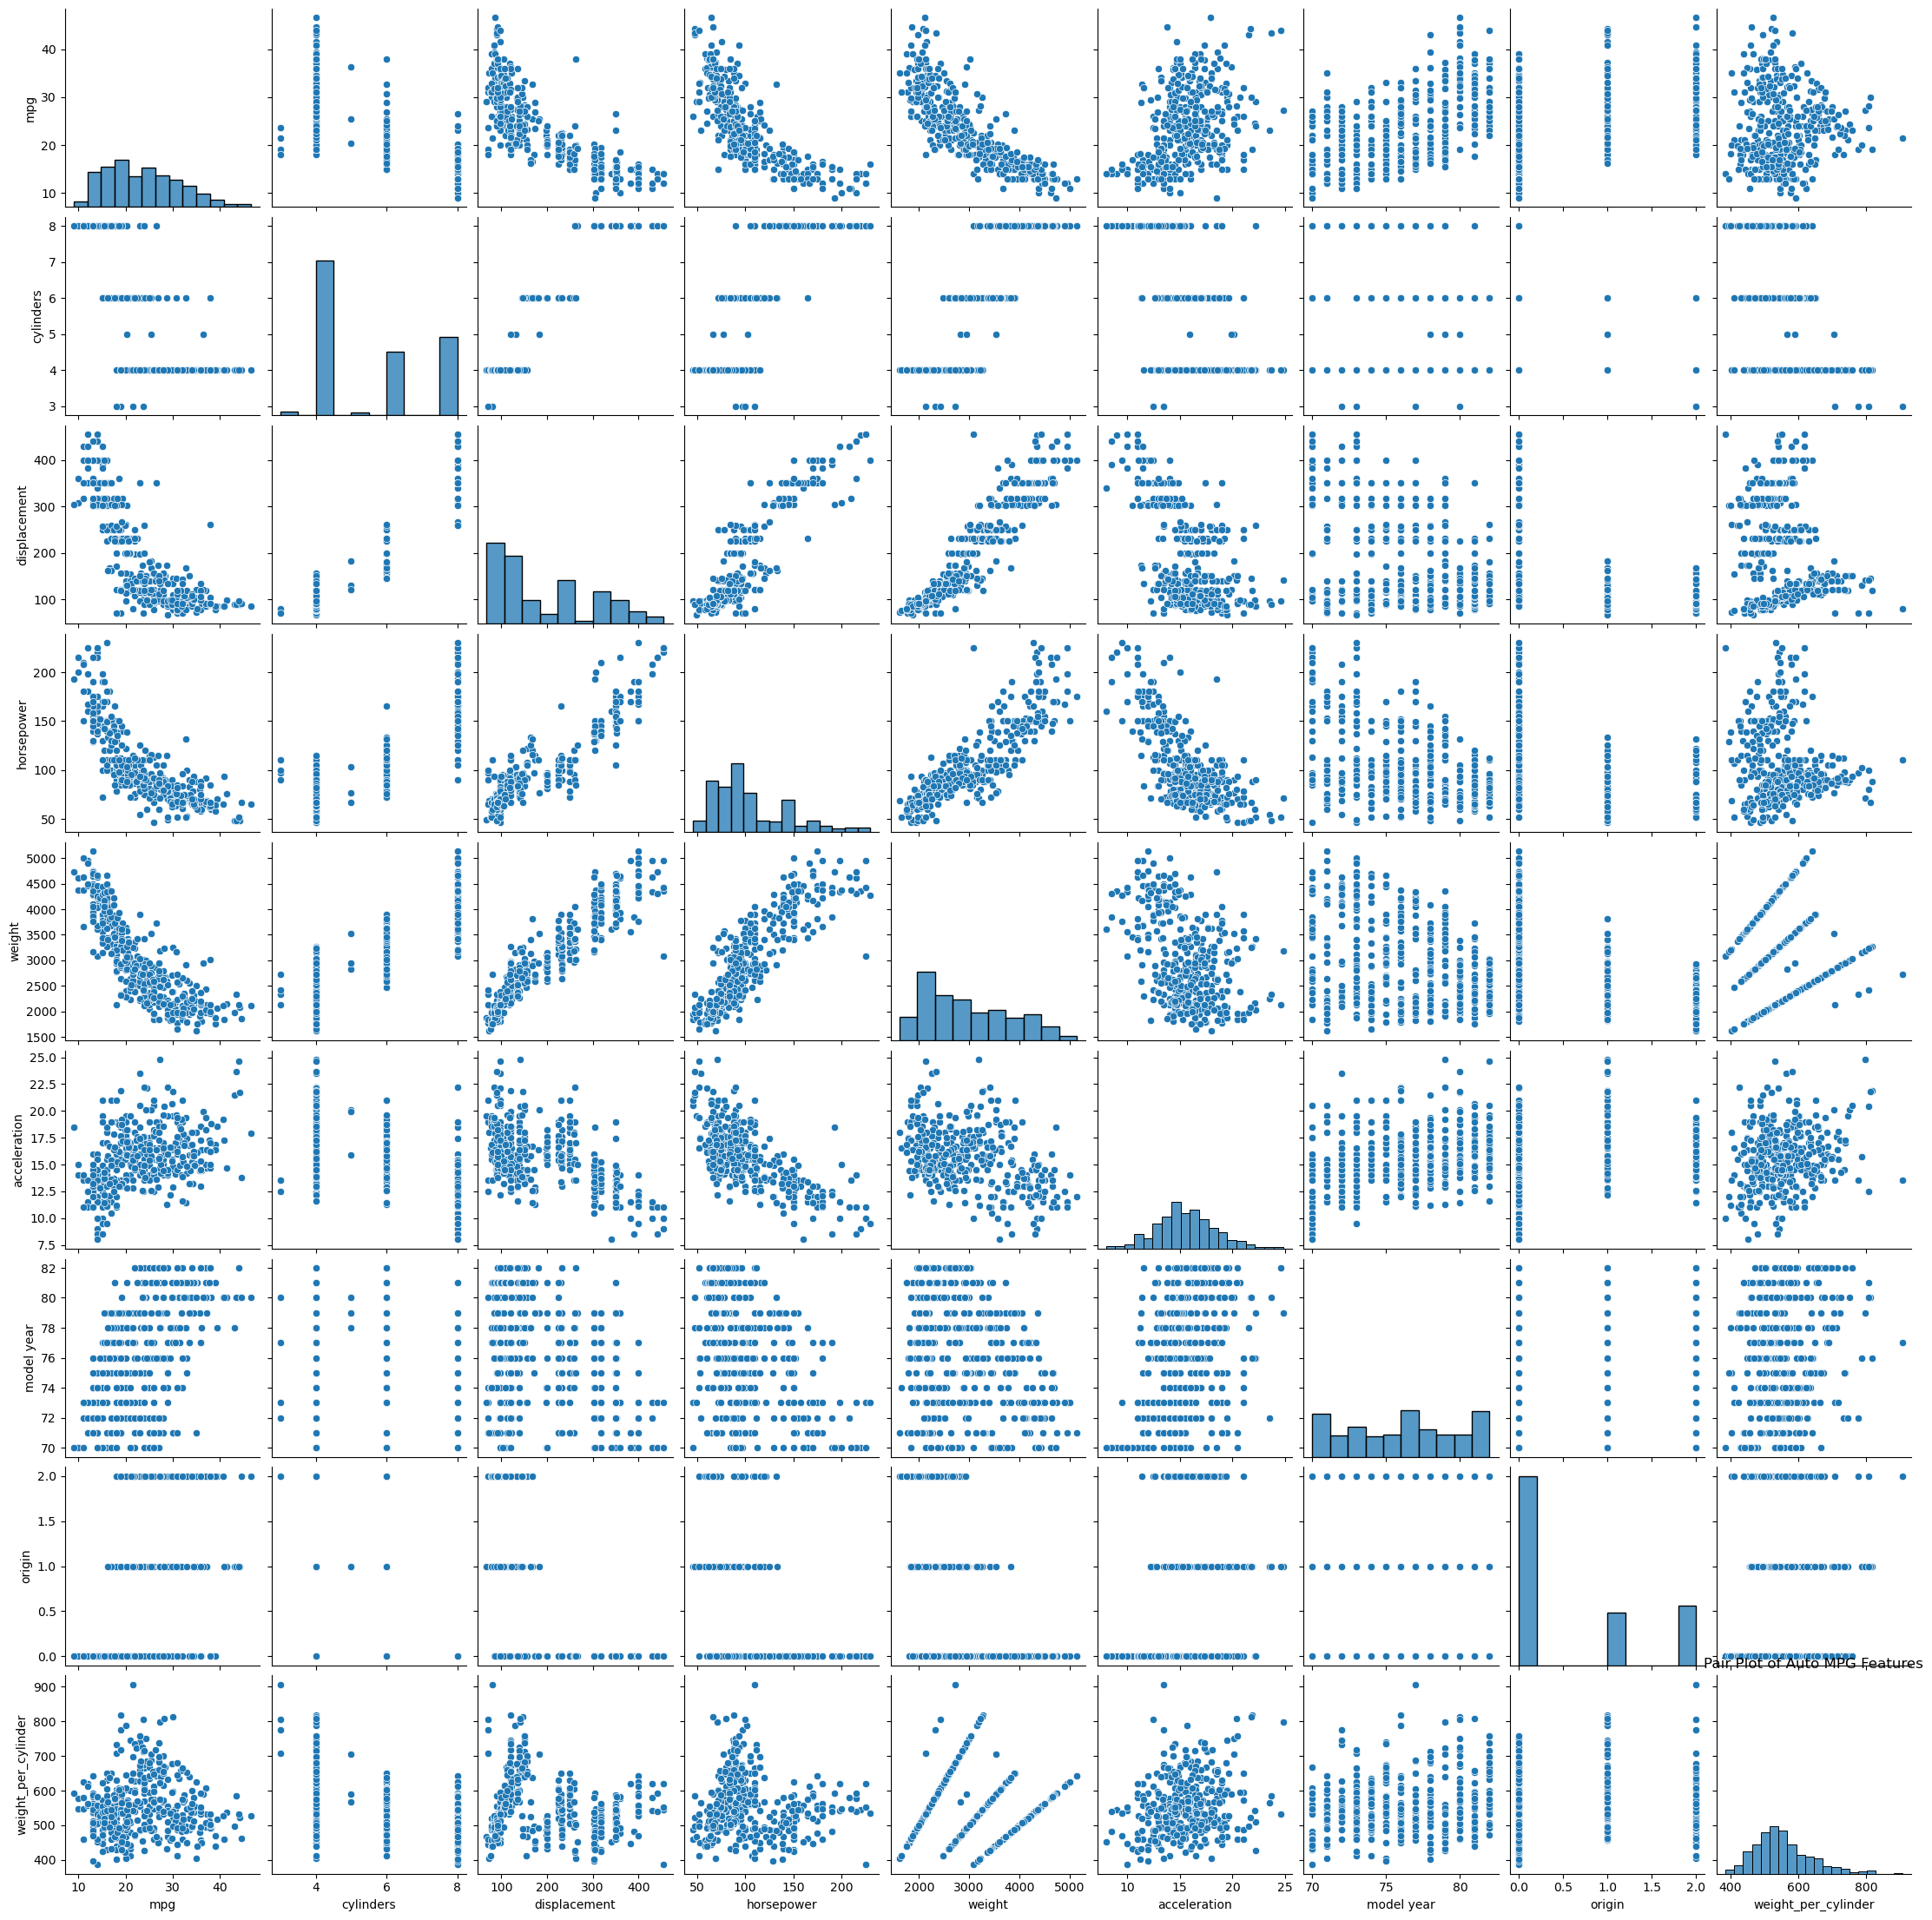

In [132]:
# Assuming 'car name' is irrelevant for correlation, we drop it if it exists
if 'car name' in df.columns:
    df = df.drop('car name', axis=1)

# Convert categorical 'origin' to integer if needed
if df['origin'].dtype == 'object':
    df['origin'] = df['origin'].astype('category').cat.codes

# 1. Summary Statistics
print("Summary Statistics:")
print(df.describe())

# 2. Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# 3. Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Auto MPG Features')
plt.show()

# 4. Pair Plot to visualize relationships between features
sns.pairplot(df)
plt.title('Pair Plot of Auto MPG Features')
plt.show()